# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 577


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
# for i, city in enumerate(cities[:3]):
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}&q={city}'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})


    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | stanley
Processing Record 3 of Set 1 | udachny
Processing Record 4 of Set 1 | alice springs
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 8 of Set 1 | portage la prairie
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | big spring
Processing Record 11 of Set 1 | port mathurin
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | ilulissat
Processing Record 14 of Set 1 | aasiaat
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 17 of Set 1 | ibia
Processing Record 18 of Set 1 | jasper
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | c

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,9.51,63,2,1.53,NZ,1726964863
1,stanley,54.8680,-1.6985,11.82,93,75,2.06,GB,1726964864
2,udachny,66.4167,112.4000,-1.93,79,53,0.58,RU,1726964865
3,alice springs,-23.7000,133.8833,23.75,19,40,5.66,AU,1726964866
4,port-aux-francais,-49.3500,70.2167,1.72,62,38,15.19,TF,1726964868


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,9.51,63,2,1.53,NZ,1726964863
1,stanley,54.8680,-1.6985,11.82,93,75,2.06,GB,1726964864
2,udachny,66.4167,112.4000,-1.93,79,53,0.58,RU,1726964865
3,alice springs,-23.7000,133.8833,23.75,19,40,5.66,AU,1726964866
4,port-aux-francais,-49.3500,70.2167,1.72,62,38,15.19,TF,1726964868


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

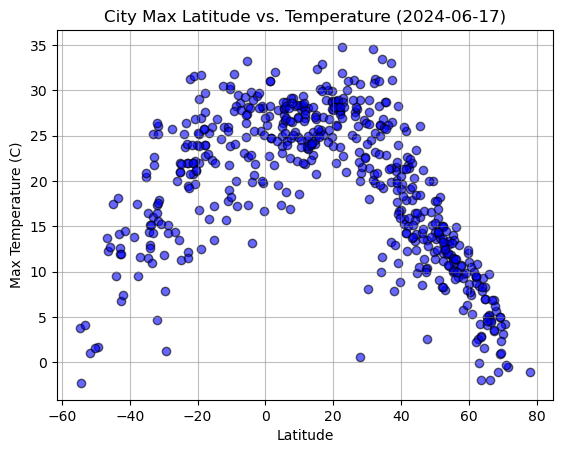

In [8]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']

plt.scatter(x_axis, y_axis, alpha=0.6, color='blue', edgecolor='black')

# Incorporate the other graph properties

plt.grid(color='grey', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature (2024-06-17)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

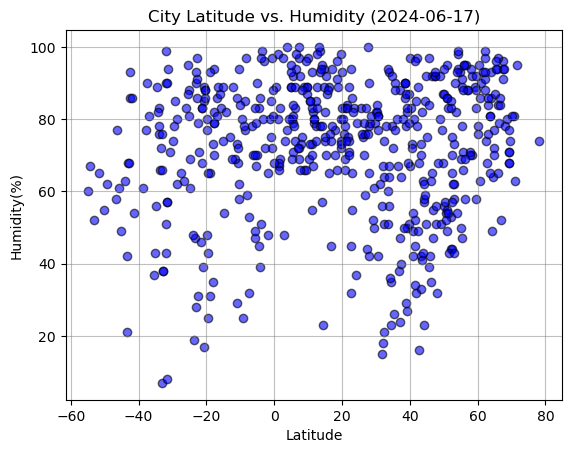

In [9]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']

plt.scatter(x_axis, y_axis, alpha=0.6, color='blue', edgecolor='black')

# Incorporate the other graph properties

plt.grid(color='grey', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude vs. Humidity (2024-06-17)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

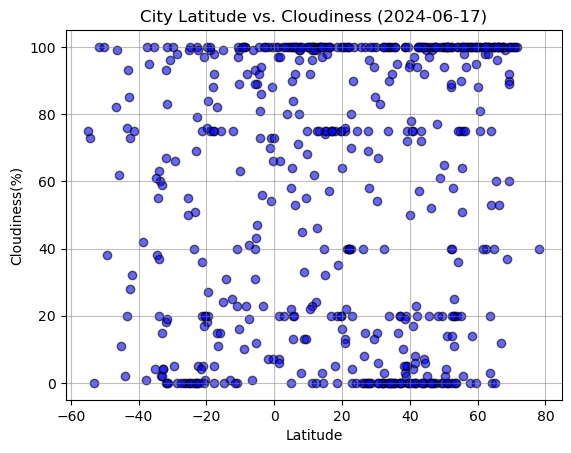

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']

plt.scatter(x_axis, y_axis, alpha=0.6, color='blue', edgecolor='black')

# Incorporate the other graph properties

plt.grid(color='grey', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs. Cloudiness (2024-06-17)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

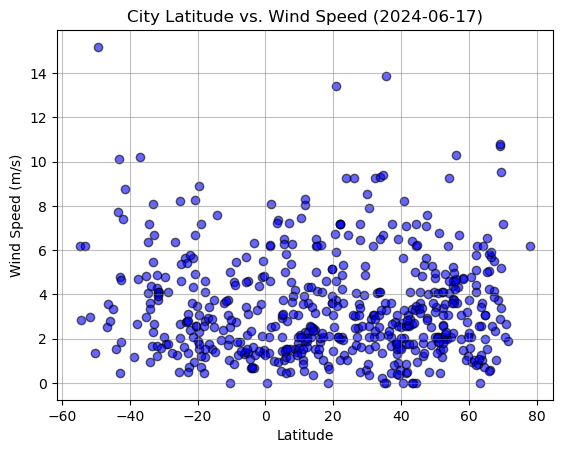

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']

plt.scatter(x_axis, y_axis, alpha=0.6, color='blue', edgecolor='black')

# Incorporate the other graph properties

plt.grid(color='grey', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2024-06-17)')


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots

def linear_regression(x_values, y_values, y_label, eq_xy, title):

    # Run linear Regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept, 2)}"
    
    # Print r square value
    print(f"The r^2-value is: {rvalue**2}")

    # Plot scatter plot 
    plt.scatter(x_values, y_values, alpha=0.5, color='blue', edgecolor= 'black')

    # Plot regression line
    plt.plot(x_values, regress_values, color='red')
    plt.annotate(line_eq, eq_xy, fontsize=15, color='red')

    # Title 
    plt.title(title)
    
    # Label plot 
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()



In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,stanley,54.8680,-1.6985,11.82,93,75,2.06,GB,1726964864
2,udachny,66.4167,112.4000,-1.93,79,53,0.58,RU,1726964865
6,portage la prairie,49.9728,-98.2926,14.38,56,65,4.75,CA,1726964871
7,big spring,32.2504,-101.4787,31.25,51,40,9.26,US,1726964671
10,ilulissat,69.2167,-51.1000,0.94,71,60,2.90,GL,1726964878


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,9.51,63,2,1.53,NZ,1726964863
3,alice springs,-23.7000,133.8833,23.75,19,40,5.66,AU,1726964866
4,port-aux-francais,-49.3500,70.2167,1.72,62,38,15.19,TF,1726964868
5,bredasdorp,-34.5322,20.0403,11.49,89,38,4.07,ZA,1726964869
8,port mathurin,-19.6833,63.4167,22.02,77,18,8.88,MU,1726964875


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7009770649690836


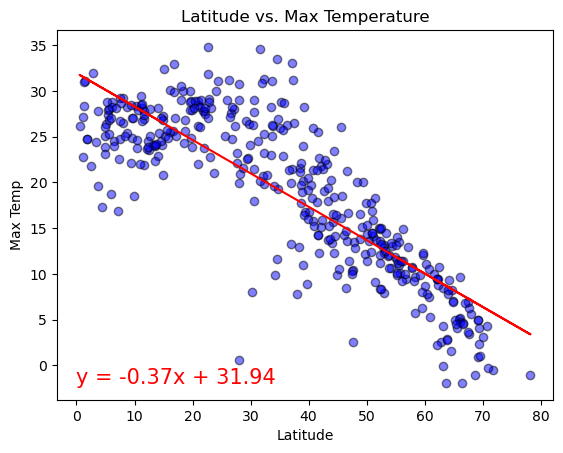

In [41]:
# Linear regression on Northern Hemisphere

linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Max Temp', (0,-2), "Latitude vs. Max Temperature")

The r^2-value is: 0.49125602932322865


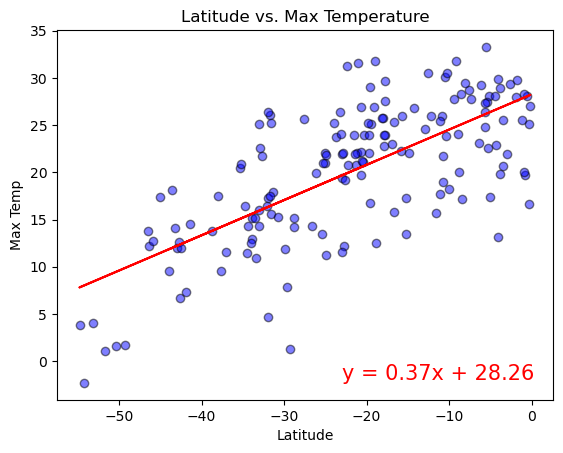

In [42]:
# Linear regression on Southern Hemisphere

linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], "Max Temp", (-23, -2), "Latitude vs. Max Temperature")

### 

**Discussion about the linear relationship:** The negative slope (-0.37) of the regression line shows that as latitude increases (moving northward from the equator), the maximum temperature decreases. This means that temperatures are warmer closer to the equator and cooler as you move toward the poles. It highlights a clear trend.

On the other hand, the positive slope (0.37) shows that as latitude increases in the southern hemisphere (moving towards the equator from the South Pole), the maximum temperature also increases.This indicates that temperatures are cooler at higher southern latitudes (closer to the South Pole) and warmer as one approaches the equator. 

The way latitude affects temperature is opposite in the northern and southern hemispheres, but it balances out between the two. In the northern hemisphere, the effect is stronger, possibly because there's more land, which causes bigger temperature changes compared to the southern hemisphere, where most of the area is covered by ocean, leading to smaller temperature differences.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.0051712954135193405


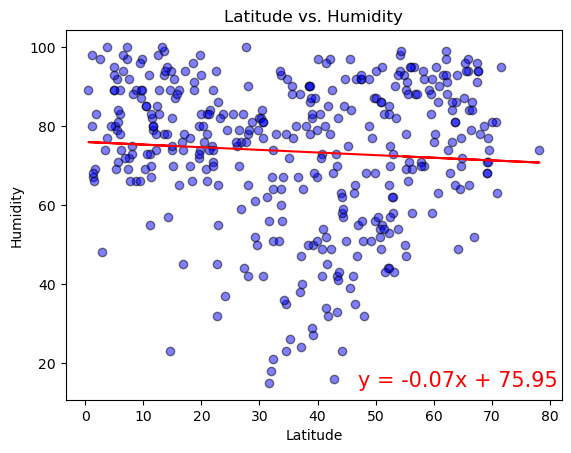

In [44]:
# Northern Hemisphere

linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], "Humidity", (47, 14), "Latitude vs. Humidity")

The r^2-value is: 0.026080950198900485


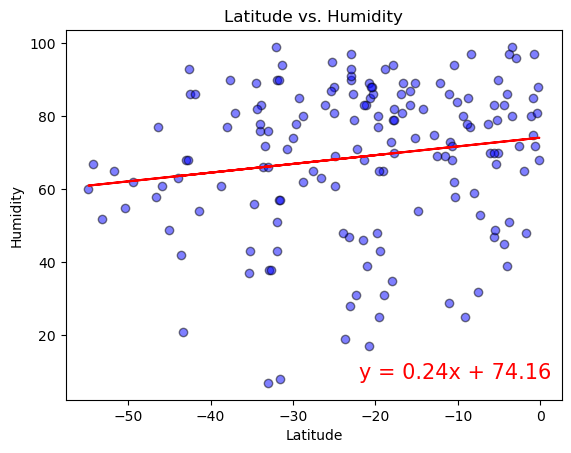

In [58]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], "Humidity", (-22, 8), "Latitude vs. Humidity")
                

**Discussion about the linear relationship:** The negative slope (-0.07) in the first regression line for the northern hemisphere shows that as latitude increases (moving northward), humidity slightly decreases. This suggests that areas closer to the equator are generally more humid, while humidity drops as you move toward higher latitudes in the northern hemisphere. However, this relationship is weak, as indicated by the low r-squared value (0.005), meaning there isn’t a strong trend.

In contrast, the second plot for the southern hemisphere shows a positive slope (0.24). This indicates that as latitude increases (moving northward towards the equator from southern latitudes), humidity increases. The relationship is still weak, as reflected in the r-squared value (0.027), but it suggests that locations closer to the equator are generally more humid, and humidity drops as you move further south toward the pole.

Overall, while the direction of the relationship between latitude and humidity differs in each hemisphere, the strength of these relationships is weak. The northern hemisphere shows a slight decrease in humidity as you move northward, while the southern hemisphere shows an increase as you approach the equator from southern latitudes. These trends are consistent with geographic expectations but aren't strongly defined in this dataset.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.002001549526136618


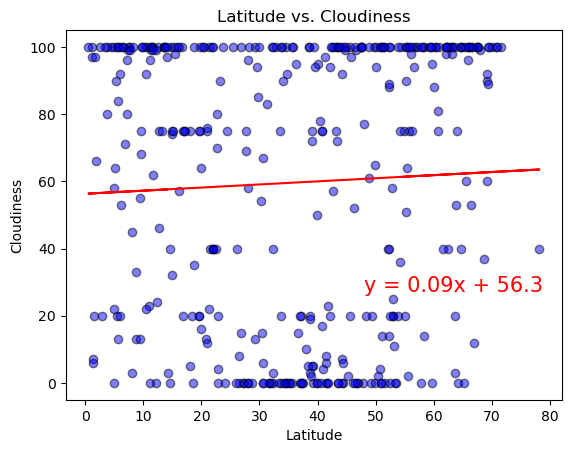

In [53]:
# Northern Hemisphere

linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], "Cloudiness", (48, 27), "Latitude vs. Cloudiness")

The r^2-value is: 0.011457874843513263


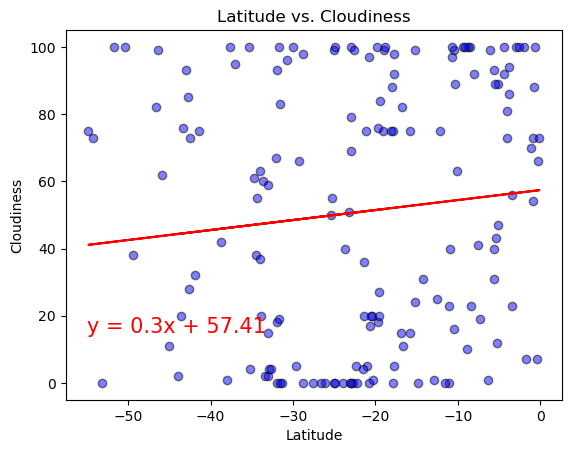

In [54]:
# Southern Hemisphere

linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], "Cloudiness", (-55, 15), "Latitude vs. Cloudiness")

**Discussion about the linear relationship:** In the northern hemisphere plot, the regression line has a slight positive slope (0.09), which indicates that as latitude increases (moving northward), cloudiness also slightly increases. However, the relationship is very weak, as shown by the extremely low r-squared value (0.002), meaning that latitude explains very little of the variation in cloudiness. This suggests that there isn’t a strong trend linking latitude to cloudiness in the northern hemisphere.

In the southern hemisphere plot, the slope (0.3), shows that as latitude increases (moving toward the equator from southern latitudes), cloudiness tends to increase. The r-squared value is still low (0.011), indicating a weak relationship. While there is a small upward trend in cloudiness, it’s not strongly defined.

In summary, both hemispheres show a slight increase in cloudiness as latitude increases, but the relationships are weak. The southern hemisphere exhibits a slightly stronger positive trend compared to the northern hemisphere, but in both cases, latitude has minimal influence on cloudiness based on this dataset.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0022554837365851925


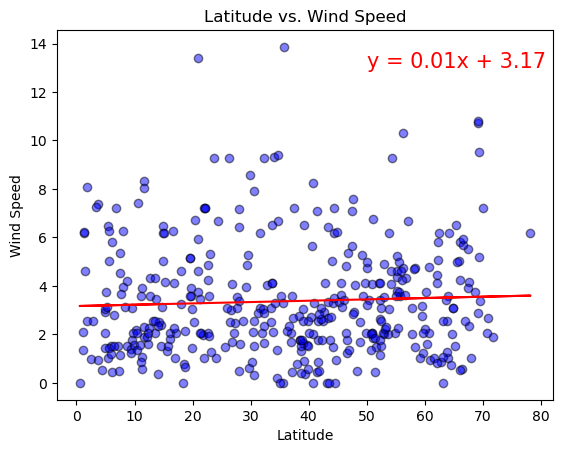

In [55]:
# Northern Hemisphere

linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], "Wind Speed", (50,13), "Latitude vs. Wind Speed")

The r^2-value is: 0.09591480205799499


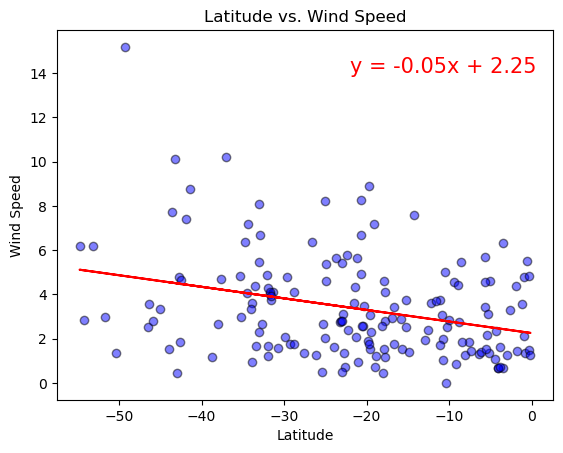

In [57]:
# Southern Hemisphere

linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], "Wind Speed", (-22, 14), "Latitude vs. Wind Speed")

**Discussion about the linear relationship:** In the northern hemisphere plot, the regression line shows a nearly flat slope (0.01), which indicates that as latitude increases, wind speed barely changes. The very low r-squared value (0.002) suggests that there is no significant relationship between latitude and wind speed in this hemisphere. Wind speeds appear fairly constant across different latitudes.

In the southern hemisphere plot, the regression line has a slight negative slope (-0.05), indicating that as latitude increases (moving toward the equator from southern latitudes), wind speed tends to decrease. The r-squared value (0.096) is still relatively low, showing that while there is a small downward trend, it’s not a very strong relationship.

Overall, wind speed does not appear to be strongly related to latitude in either hemisphere. In the northern hemisphere, the relationship is almost nonexistent, while in the southern hemisphere, there is a slight decrease in wind speed as you move northward toward the equator. However, neither relationship is strong based on the data.